In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

np.set_printoptions(precision = 2, suppress = False, formatter={'float_kind':'{:.3e}'.format})

## Week 4
Create a uniformly distributed zero mean white random noise with signal power 1. Quantize this noise using an 8 bit quantizer and measure the quantization noise power and compare the measured power with the calculated power.

In [2]:
# compute quantization step
nbits = 8
quant = 1. / 2 ** nbits

# create white noise
nsamples = int(1e6)
noise = np.random.random(size = nsamples)

# quantize noise and compute error
quantized = np.floor(noise / quant) * quant
err = quantized - noise

# show that the error is uniformly distributed
hist = plt.hist(err, bins = 256)

# compute noise power
pow_err = np.std(err) ** 2
pow_err_theory = quant ** 2 / 12

print(f"Noise power: Empirical = {pow_err:.5e}, Theoretical = {pow_err_theory:.5e}")

Noise power: Empirical = 1.27138e-06, Theoretical = 1.27157e-06


## Week 5

Implement a subtractive dither system using rectangular dither for re-quantizing a 8 bit gray image with a 2 bit quantizer. Compare the quantized image with and without dither.

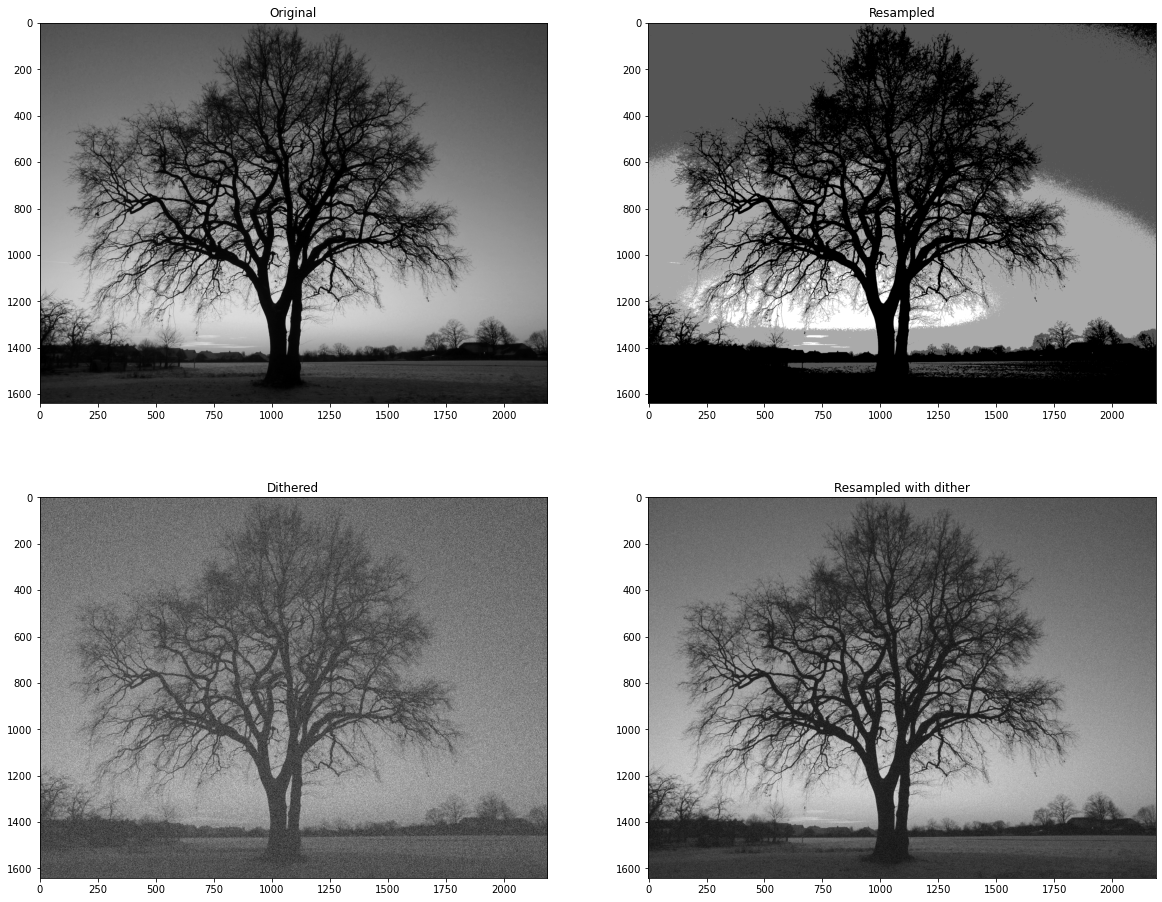

In [3]:
# compute quantization step
nbits = 2
quant = 1. / 2 ** nbits

# load image and remove alpha channel
im = mpimg.imread('./week5/baum.png')[:,:,:3]

# create some white noise
noise = np.array([np.random.random(size = len(im[0])) for row in range(len(im))])

# process image
im_grayscale = np.mean(im, axis = 2)
im_resampled = quant * np.floor(im_grayscale / quant)
im_dithered = im_grayscale + noise
im_dithered_resampled = quant * np.floor(im_dithered / quant) - noise

# plot the image
fig = plt.figure(figsize = (20, 16))
nrows = 2
ncols = 2

fig.add_subplot(nrows, ncols, 1).set_title("Original")
plt.imshow(im_grayscale, cmap = 'gray')

fig.add_subplot(nrows, ncols, 2).set_title("Resampled")
plt.imshow(im_resampled, cmap = 'gray')

fig.add_subplot(nrows, ncols, 3).set_title("Dithered")
plt.imshow(im_dithered, cmap = 'gray')

fig.add_subplot(nrows, ncols, 4).set_title("Resampled with dither")
plt.imshow(im_dithered_resampled, cmap = 'gray')